In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [2]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2019-02-26 18:46:15--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  47.5MB/s    in 5.1s    

2019-02-26 18:46:20 (33.8 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [0]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2019-02-25 18:04:28--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  13.5MB/s    in 7.2s    

2019-02-25 18:04:35 (8.49 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [0]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']
  
X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

('Training Set', (32, 32, 3, 73257), (73257, 1))
('Test Set', (32, 32, 3, 26032), (26032, 1))


In [0]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

('Training Set', (73257, 32, 32, 3))
('Test Set', (26032, 32, 32, 3))

('Total Number of Images', 99289)


In [0]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

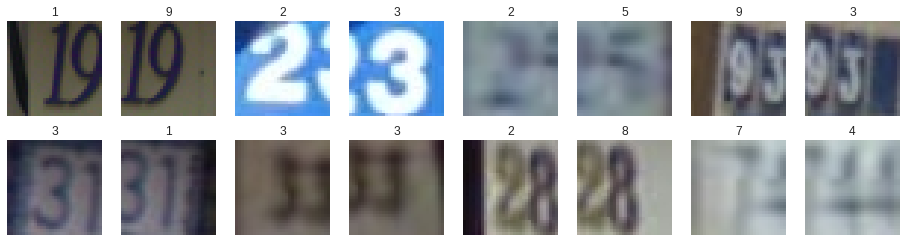

In [0]:
# Plot some training set images
plot_images(X_train, y_train, 2, 8)

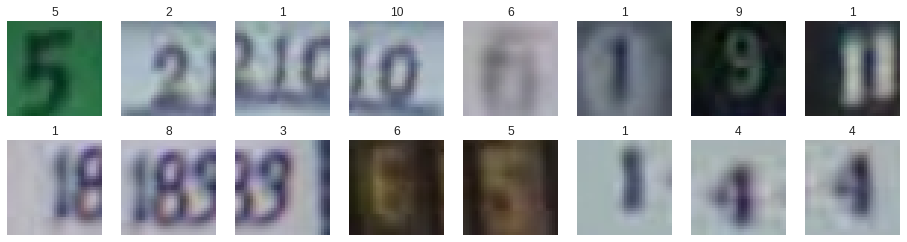

In [0]:
# Plot some test set images
plot_images(X_test, y_test, 2, 8)

In [0]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


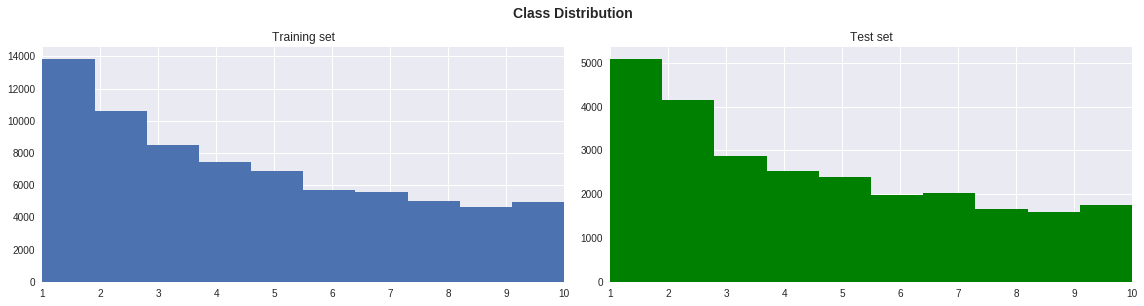

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [0]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7)

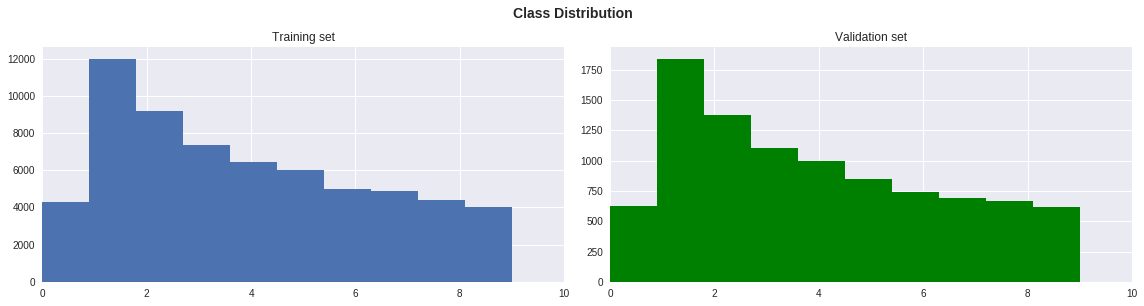

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(0, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation set")

fig.tight_layout()

In [0]:
y_train.shape, y_val.shape, y_test.shape

((63733,), (9524,), (26032,))

In [0]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
val_greyscale = rgb2gray(X_val).astype(np.float32)

In [0]:
print("Training Set", train_greyscale.shape)
print("Validation Set", val_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('')

('Training Set', (63733, 32, 32, 1))
('Validation Set', (9524, 32, 32, 1))
('Test Set', (26032, 32, 32, 1))



In [0]:
del X_train, X_test, X_val

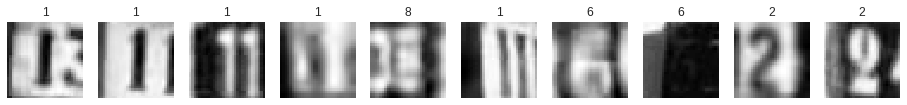

In [0]:
plot_images(train_greyscale, y_train, 1, 10)

![normalized_img.png](http://cs231n.github.io/assets/nn2/prepro1.jpeg)

In [0]:
# Calculate the mean on the training data
train_mean = np.mean(train_greyscale, axis=0)

# Calculate the std on the training data
train_std = np.std(train_greyscale, axis=0)

# Subtract it equally from all splits
train_greyscale_norm = (train_greyscale - train_mean) / train_std
test_greyscale_norm = (test_greyscale - train_mean)  / train_std
val_greyscale_norm = (val_greyscale - train_mean) / train_std

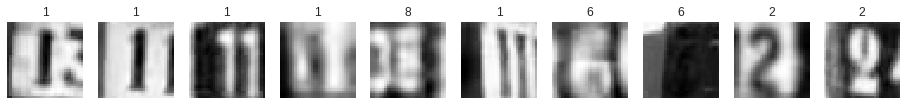

In [0]:
plot_images(train_greyscale_norm, y_train, 1, 10)

In [0]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Validation set", y_val.shape)
print("Test set", y_test.shape)

('Training set', (63733, 10))
('Validation set', (9524, 10))
('Test set', (26032, 10))


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Code 2

In [0]:
import h5py

# Create file
h5f = h5py.File('SVHN_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=train_greyscale_norm)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=test_greyscale_norm)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=val_greyscale_norm)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()

In [0]:
import os
import time
from __future__ import absolute_import
from __future__ import print_function
from datetime import timedelta
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

In [0]:
TENSORBOARD_SUMMARIES_DIR = '/tmp/svhn_classifier_logs'

In [0]:
# Open the file as readonly
h5f = h5py.File('SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


In [0]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    """ Plot nrows * ncols images from images and annotate the images
    """
    # Initialize the subplotgrid
    fig, axes = plt.subplots(nrows, ncols)
    
    # Randomly select nrows * ncols images
    rs = np.random.choice(images.shape[0], nrows*ncols)
    
    # For every axes object in the grid
    for i, ax in zip(rs, axes.flat): 
        
        # Predictions are not passed
        if cls_pred is None:
            title = "True: {0}".format(np.argmax(cls_true[i]))
        
        # When predictions are passed, display labels + predictions
        else:
            title = "True: {0}, Pred: {1}".format(np.argmax(cls_true[i]), cls_pred[i])  
            
        # Display the image
        ax.imshow(images[i,:,:,0], cmap='binary')
        
        # Annotate the image
        ax.set_title(title)
        
        # Do not overlay a grid
        ax.set_xticks([])
        ax.set_yticks([])

In [0]:
def prepare_log_dir():
    '''Clears the log files then creates new directories to place
        the tensorbard log file.''' 
    if tf.gfile.Exists(TENSORBOARD_SUMMARIES_DIR):
        tf.gfile.DeleteRecursively(TENSORBOARD_SUMMARIES_DIR)
    tf.gfile.MakeDirs(TENSORBOARD_SUMMARIES_DIR)

In [0]:
def get_batch(X, y, batch_size=512):
    for i in np.arange(0, y.shape[0], batch_size):
        end = min(X.shape[0], i + batch_size)
        yield(X[i:end],y[i:end])

In [0]:
comp = 32*32
tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here
x = tf.placeholder(tf.float32, shape = [None, 32, 32, 1], name='Input_Data')
y = tf.placeholder(tf.float32, shape = [None, 10], name='Input_Labels')
y_cls = tf.argmax(y, 1)

discard_rate = tf.placeholder(tf.float32, name='Discard_rate')
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [0]:
def cnn_model_fn(features):
    """Model function for CNN."""
    
      # Input Layer
    input_layer = tf.reshape(features, [-1, 32, 32, 1], name='Reshaped_Input')

      # Convolutional Layer #1
    #with tf.name_scope('Conv1 Layer + ReLU'):
    
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

      # Pooling Layer #1
    #with tf.name_scope('Pool1 Layer'):
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

      # Convolutional Layer #2 and Pooling Layer #2
    #with tf.name_scope('Conv2 Layer + ReLU'): 
    conv2 = tf.layers.conv2d(
          inputs=pool1,
          filters=64,
          kernel_size=[5, 5],
          padding="same",
          activation=tf.nn.relu)
        
    #with tf.name_scope('Pool2 Layer'):
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

      # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 8 * 8 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=256, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
         inputs=dense, rate=discard_rate)

      # Logits Layer
    #with tf.name_scope('Logits Layer'):
    logits = tf.layers.dense(inputs=dropout, units=10)

    return logits


In [0]:
max_epochs = 10
num_examples = X_train.shape[0]

In [0]:
prepare_log_dir()

In [0]:
#with tf.name_scope('Model Prediction'):
prediction = cnn_model_fn(x)
prediction_cls = tf.argmax(prediction, 1)
#with tf.name_scope('loss'):
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(
   onehot_labels=y, logits=prediction))
    #tf.summary.scalar('loss', loss)
    
#with tf.name_scope('Adam Optimizer'):
optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use tf.cast instead.


In [0]:
# Predicted class equals the true class of each image?
correct_prediction = tf.equal(prediction_cls, y_cls)

# Cast predictions to float and calculate the mean
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

### Saver Object

In [0]:
saver = tf.train.Saver()

save_dir = 'checkpnts/'

# Create directory if it does not exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
save_path = os.path.join(save_dir, 'svhn_single_greyscale')

### Initialized Variable

In [0]:
## No of example in each batch for updating weights
batch_size = 512

#Discarding or fuse % of neurons in Train mode
discard_per = 0.7

In [0]:
#with tf.Session() as sess:
 #   sess.run(tf.global_variables_initializer())
    
## To calculate total time of training
train_loss = []
valid_loss = []
start_time = time.time()
for epoch in range(max_epochs):
    print ('Training .........')
    epoch_loss = 0
    print ()
    print ('Epoch ', epoch+1 , ': ........ \n')
    step = 0   
    
    ## Training epochs ....
    for (epoch_x , epoch_y) in get_batch(X_train, y_train, batch_size):
        _, train_accu, c = sess.run([optimizer, accuracy, loss], feed_dict={x: epoch_x, y: epoch_y, discard_rate: discard_per})
        train_loss.append(c)
    
        if(step%40 == 0):
            print ("Step:", step, ".....", "\nMini-Batch Loss   : ", c)
            print('Mini-Batch Accuracy :' , train_accu*100.0, '%')

            ## Validating prediction and summaries
            accu = 0.0
            for (epoch_x , epoch_y) in get_batch(X_val, y_val, 512):                            
                correct, _c = sess.run([correct_prediction, loss], feed_dict={x: epoch_x, y: epoch_y, discard_rate: 0.0})
                valid_loss.append(_c)
                accu+= np.sum(correct[correct == True])
            print('Validation Accuracy :' , accu*100.0/y_val.shape[0], '%')
            print ()
        step = step + 1


    print ('Epoch', epoch+1, 'completed out of ', max_epochs)

    
## Calculate net time
time_diff = time.time() - start_time

## Testing prediction and summaries
accu = 0.0
for (epoch_x , epoch_y) in get_batch(X_test, y_test, 512):
    correct = sess.run([correct_prediction], feed_dict={x: epoch_x, y: epoch_y, discard_rate: 0.0})
    accu+= np.sum(correct[correct == True])
print('Test Accuracy :' , accu*100.0/y_test.shape[0], '%')
print("Time usage: " + str(timedelta(seconds=int(round(time_diff)))))
print ()

Training .........

Epoch  1 : ........ 

Step: 0 ..... 
Mini-Batch Loss   :  2.3038237
Mini-Batch Accuracy : 11.1328125 %
Validation Accuracy : 19.3616127677 %

Step: 40 ..... 
Mini-Batch Loss   :  1.1706496
Mini-Batch Accuracy : 60.9375 %
Validation Accuracy : 68.3431331373 %

Step: 80 ..... 
Mini-Batch Loss   :  0.6286223
Mini-Batch Accuracy : 80.078125 %
Validation Accuracy : 81.8668626627 %

Step: 120 ..... 
Mini-Batch Loss   :  0.53432506
Mini-Batch Accuracy : 83.0078125 %
Validation Accuracy : 84.974800504 %

Epoch 1 completed out of  10
Training .........

Epoch  2 : ........ 

Step: 0 ..... 
Mini-Batch Loss   :  0.5101795
Mini-Batch Accuracy : 86.9140625 %
Validation Accuracy : 85.1532969341 %

Step: 40 ..... 
Mini-Batch Loss   :  0.5069083
Mini-Batch Accuracy : 85.9375 %
Validation Accuracy : 86.0142797144 %

Step: 80 ..... 
Mini-Batch Loss   :  0.4528019
Mini-Batch Accuracy : 86.1328125 %
Validation Accuracy : 87.0327593448 %

Step: 120 ..... 
Mini-Batch Loss   :  0.41881558

** To save the model Checkpoints **

In [0]:
saver.save(sess=sess, save_path=save_path)

'checkpnts/svhn_single_greyscale'

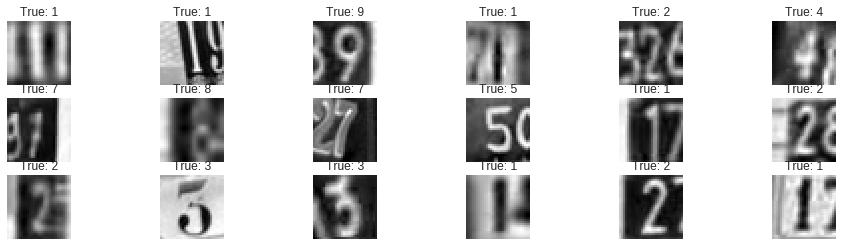

In [0]:
plot_images(X_train, 3, 6, y_train);

In [0]:
test_pred = []
for (epoch_x , epoch_y) in get_batch(X_test, y_test, 512):
    correct = sess.run([prediction_cls], feed_dict={x: epoch_x, y: epoch_y, discard_rate: 0.0})
    test_pred.append((np.asarray(correct, dtype=int)).T)

print ('Completed')

Completed


In [0]:
def flatten(lists):
    results = []
    for numbers in lists:
        for x in numbers:
            results.append(x)
    return np.asarray(results)

In [0]:
flat_array = flatten(test_pred)
flat_array = (flat_array.T)
flat_array = flat_array[0]

In [0]:
flat_array.shape

(26032,)

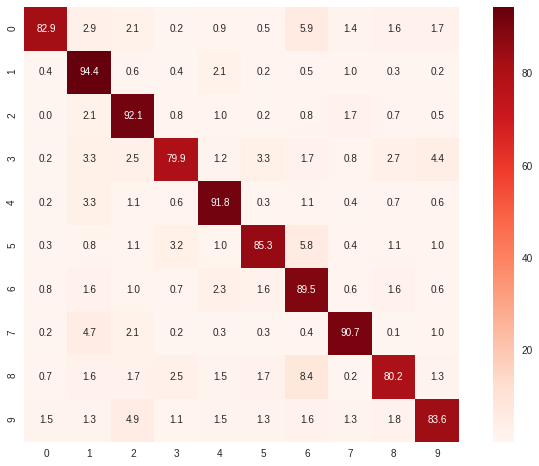

In [0]:
from sklearn.metrics import confusion_matrix

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=flat_array)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);

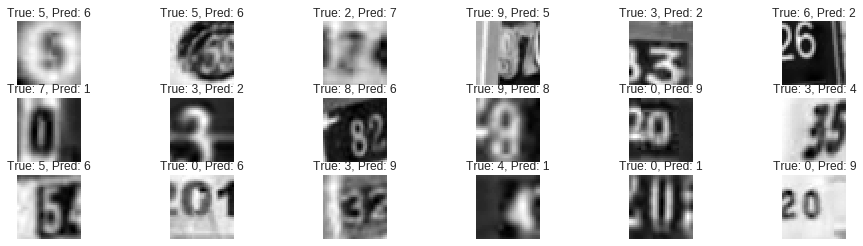

In [0]:
# Find the incorrectly classified examples
incorrect = flat_array != np.argmax(y_test, axis=1)

# Select the incorrectly classified examples
images = X_test[incorrect]
cls_true = y_test[incorrect]
cls_pred = flat_array[incorrect]

# Plot the mis-classified examples
plot_images(images, 3, 6, cls_true, cls_pred);

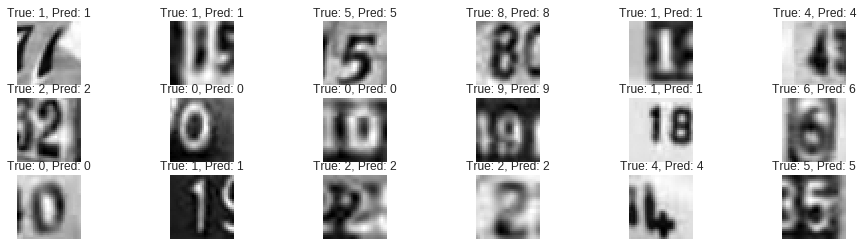

In [0]:
# Find the incorrectly classified examples
correct = np.invert(incorrect)

# Select the correctly classified examples
images = X_test[correct]
cls_true = y_test[correct]
cls_pred = flat_array[correct]

# Plot the mis-classified examples
plot_images(images, 3, 6, cls_true, cls_pred);

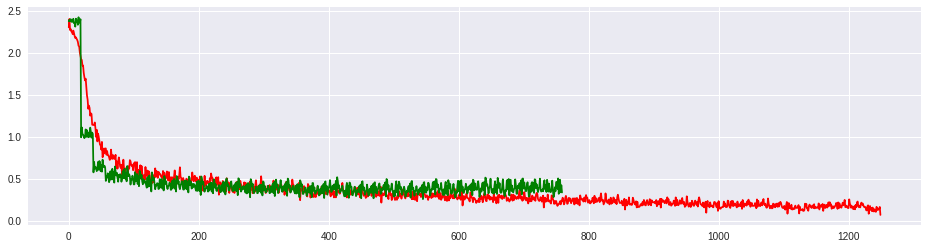

In [0]:
import matplotlib.pyplot as plt
plt.plot(train_loss ,'r')
plt.plot(valid_loss, 'g')